# Best Neighborhood in Pittsburgh

## Team Filthy Burghers

#### Introduction

Using the datasets provided by the WPRDC, our team used the following factors to determine the best neighborhood in Pittsburgh as:

* Education
* Employment
* Code Violations

Education data was included because generally good education leads to a good neighborhood. Good education causes property prices to increase and makes the area more sought after bringing in wealthier people. The best way to figure out the best education in each neighborhood was by looking at the percents of Bachelor's degrees and Post Graduate's degrees comparing the percentages to the population. Employment was included because the more people that are employed the more money that is being brought in. For employment we used the number of people employed in each neighborhood compared to the populatin of the neighborhood. With more money people have more to give to the community allowing it to prosper and grow. Finally, Code Violations were included because the less code violations that a neighborhood has means that the buildings were built well, being maintained well, and safer to the general public. The approximate number of buildings in each neighborhood was taken into consideration, so that larger neighborhood wouldn't be at a disadvantage. 

#### The Metrics

##### Education

The first factor that determined which neighborhood was the best is education. I did not want to find rates by dividing the population of people aged 25 and older by the total population because it would include the people that are under poverty and people who are not high school graduates, which do not represent the best neighborhood. Also, I eliminated chateau because of a lack of information. The best neighborhoods should have a high number of people with bachelor’s and postgraduates degrees. For this metric, I converted the percentages of people with bachelor’s degrees and postgraduates degrees to decimals and multiplied it to the population of each neighborhood, which gave the number of people with those degrees.

Best: Squirrel Hill South

Worst: California-Kirkbride, Northview Heights

##### Employment

Our second factor to determine the best neighborhood was employment. For this metric, I divided the total number of residents employed (of legal age, 16+) by the total population in the neighborhood. This made the data less skewed, taking into consideration neighborhoods with low population values. I noticed that Chateau, while having zero people employed, had a population under 100, so I considered it an outlier and removed it. I also noticed that the employment rate of some of the neighborhoods were over 100%, which occurred because the number of employed residents exceeded the total population. This data was rather odd and didn’t make sense, and there was nothing in the data dictionary that explained these results. Thus, I omitted the two neighborhoods with values over 100%, which was South Shore and St. Clair.

Best: Spring Garden

Worst: Fairywood

##### Building Code Violations

The third and final factor that we used to determine the best neighborhood was building code violations. To determine the best neighborhood for this metric I took the number total number of code violations for each neighborhood and divided it by the approximate number of structures in each neighborhood. This made neighborhoods with more buildings on an equal playing field as the areas with less buildings by creating this ratio. I noticed that some neighborhoods had 0 code violations with under 50 buildings, so I considered them to be outliers and removed those neighborhoods.

Best: Regent Square

Worst: West Oakland

#### The Best Neighborhood

According to education, employment, and code violations the best neighborhood in Pittsburgh to live in is Shadyside.

#### Conclusion

Unfortunately, our group is not very familiar with many of the neighborhoods in Pittsburgh. Although, from our [research](https://www.reddit.com/r/pittsburgh/comments/4hqbu0/how_safe_is_shadyside/) it seems that Shadyside is considered a very nice, safe neighborhood for families. The education results for Shadyside were expected due to the close proximity to college campuses like Pitt and CMU. The employment results were some what expected because Shadyside is very close to the UPMC hospitals making a prime location for the workers there. The code violation results were not as useful because it doesn't provide as much data about the residents of each neighborhood. It would be interesting to see how the data has changed over time since our results are based on the 2010 census data with the 2020 census data being available in the near future.

#### Data Explained

education is the data for Pittsburgh's education in 2010

employment is the data for Pittsburgh's employment in 2010

bdc_data is the data for the buildings code violations in Pittsburgh in 2010

In [49]:
#importing pandas, numpy, and matplot
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

education = pd.read_csv("education.csv", index_col="Neighborhood", thousands = ",")

employment = pd.read_csv('employment.csv', index_col="Neighborhood", usecols = ["Neighborhood","Population (2010)", "Total Age 16+ N'hood Residents Employed (2010 Est.)"])

bdc_data = pd.read_csv("https://data.wprdc.org/dataset/40188e1c-6d2e-4f20-9391-607bd3054949/resource/61a264ec-a537-42de-91e3-5752d689103d/download/built-enviornment-conditions.csv",
                      index_col="Neighborhood", thousands=',')

#### Eduacation Data Analysis

Here we calculate the number of people with a Bachelor Degree in each neighborhood eliminating Chateau because of a lack of information

In [10]:
education[['Population (2010)',"Edu. Attainment: Bachelor's Degree (2010)", "Edu. Attainment: Postgraduate Degree (2010)"]].sort_values('Population (2010)', ascending = False).head(10)

#converting percentages to floats, largest to smallest
educationPer = education.loc[:, "Edu. Attainment: Bachelor's Degree (2010)"].str.rstrip('%').astype('float')/100
educationPer = educationPer.sort_values(ascending = False)

#multiplying the population with the percentages of bachelor's degrees
educationPopulation = educationPer.multiply(education.loc[:,"Population (2010)"])

#number of people with bachelor's degrees
educationPopulation = educationPopulation.sort_values(ascending = False)

educationPopulation.loc["Shadyside" : "Northview Heights"]

Neighborhood
Shadyside              4494.545
Squirrel Hill South    4140.140
Squirrel Hill North    3033.921
North Oakland          2890.974
Brookline              2140.668
                         ...   
Esplen                    0.000
South Shore               0.000
Mt. Oliver                0.000
East Carnegie             0.000
Northview Heights         0.000
Length: 89, dtype: float64

Here we calculate the number of people with a Postgraduate Degree in each neighborhood eliminating Chateau because of a lack of information

In [9]:
#converting percentages to floats, largest to smallest
postGraduatePer = education.loc[:, 'Edu. Attainment: Postgraduate Degree (2010)'].str.rstrip('%').astype('float')/100
postGraduatePer = postGraduatePer.sort_values(ascending = False)

#multiplying the population with the percentages of postgraduate degrees
educationPopulation2 = postGraduatePer.multiply(education.loc[:,"Population (2010)"])

#number of people with postgraduate degrees
educationPopulation2 = educationPopulation2.sort_values(ascending = False)

educationPopulation2.loc["Squirrel Hill South" : "California-Kirkbride"]

Neighborhood
Squirrel Hill South     4835.200
Squirrel Hill North     4556.563
Shadyside               4146.670
North Oakland           3154.749
Highland Park           2033.610
                          ...   
Arlington Heights          0.000
Hays                       0.000
Glen Hazel                 0.000
Fairywood                  0.000
California-Kirkbride       0.000
Length: 89, dtype: float64

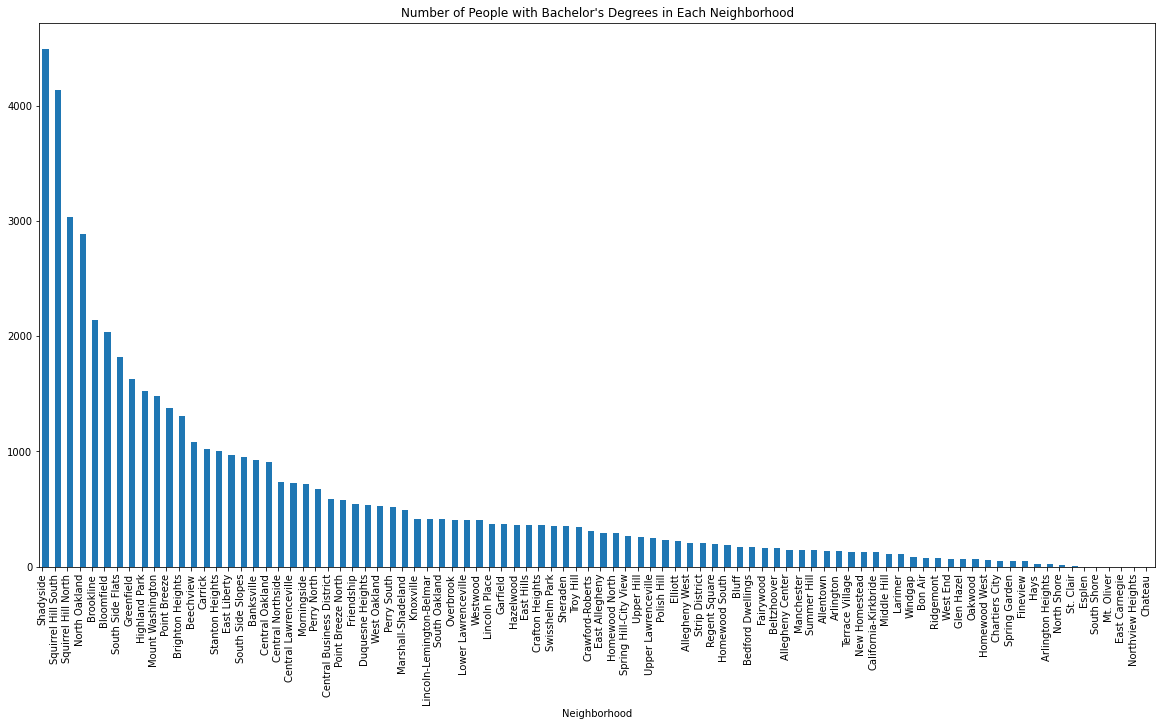

In [20]:
# bar graph for the number of people with bachelor's degrees in each neighborhood
educationPopulation.plot(kind = "bar",title = "Number of People with Bachelor's Degrees in Each Neighborhood", x = "Neighborhood", y = "Number of People", figsize = (20,10), position = 0)

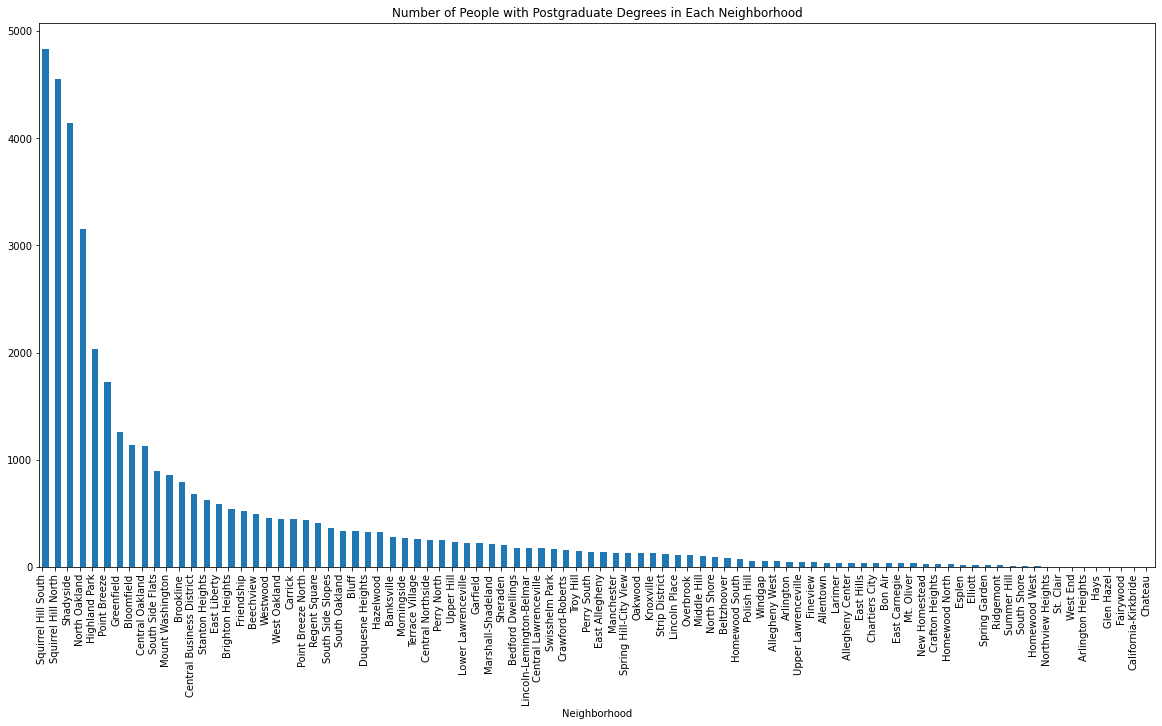

In [22]:
# bar graph for number of people with postgraduate degrees in each neighborhood
educationPopulation2.plot(kind = "bar",title = "Number of People with Postgraduate Degrees in Each Neighborhood", x = "Neighborhood", y = "Number of People", figsize = (20,10), position = 0)

#### Employment Data Analysis

Here we calculate employment rates in each neighborhood eliminating outliers where the total population was less than 100, and where employment rate was greater than 100%

In [53]:
#removing commas from numeric data
employment = employment.replace(',', '', regex = True)

#convert numeric data to float
employment['Population (2010)'] = employment['Population (2010)'].astype(float)
employment['Total Age 16+ N\'hood Residents Employed (2010 Est.)'] = employment['Total Age 16+ N\'hood Residents Employed (2010 Est.)'].astype(float)

#creating new column for employment per population
#multiply by 100 to see the rates easier
employment['Employment Rate'] = employment['Total Age 16+ N\'hood Residents Employed (2010 Est.)'] / employment['Population (2010)'] * 100

#sorting from highest to lowest employment rate
employment = employment.sort_values(by='Employment Rate', ascending = False)

#filtering out unreasonable data, employment rate > 100% (more employed than total population)
employment = employment.loc[employment['Employment Rate'] < 100]

#filtering out outliers, where total population is less than 100
employment = employment.loc[employment['Population (2010)'] > 100]

employment

,Population (2010),Total Age 16+ N'hood Residents Employed (2010 Est.),Employment Rate
Neighborhood,,,
Spring Garden,884.0,668.0,75.565611
New Homestead,990.0,737.0,74.444444
Polish Hill,1274.0,941.0,73.861852
Regent Square,928.0,657.0,70.797414
South Side Flats,6597.0,4425.0,67.075944
...,...,...,...
Northview Heights,1214.0,296.0,24.382208
Bluff,6600.0,1491.0,22.590909
East Carnegie,570.0,109.0,19.122807


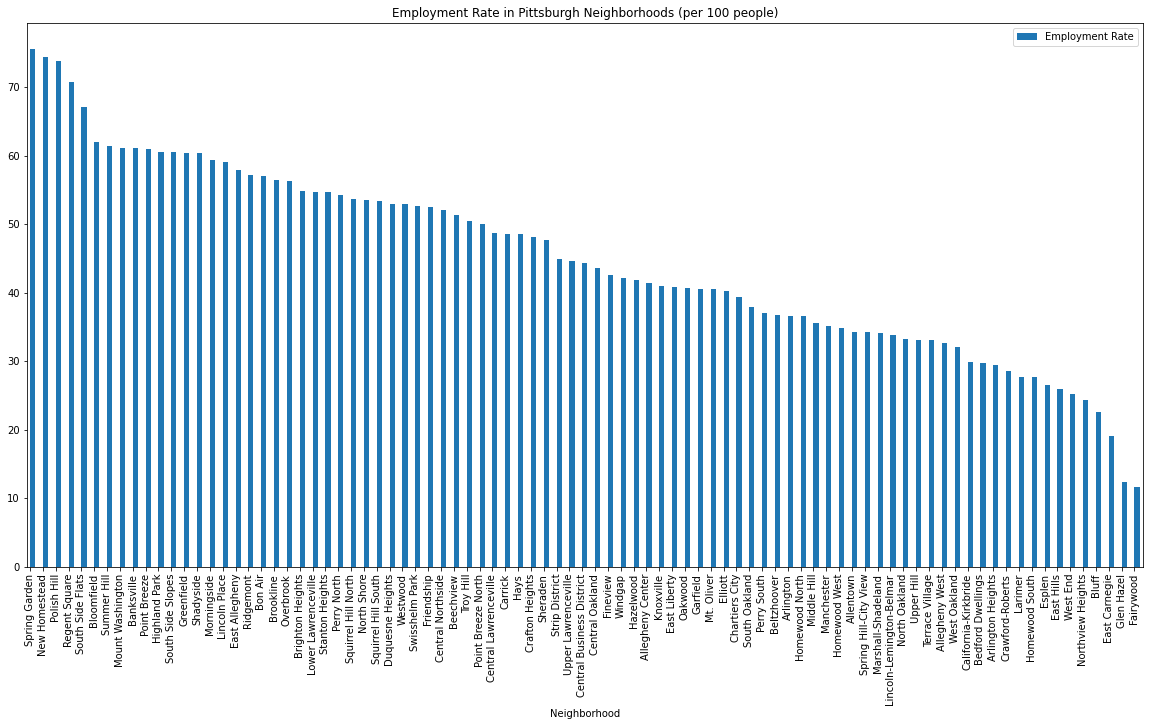

In [54]:
#Plotting a bar graph of Employment Rate in Pittsburgh Neighborhoods (per 100 people)
employment.plot(title = "Employment Rate in Pittsburgh Neighborhoods (per 100 people)", y = "Employment Rate", kind ="bar", width = .4, figsize = (20,10), position=0)

#### Code Violations Data Analysis

Here we calculate the ratio of code violations per neighborhood based on the number of buildings in each neighborhood eliminating any neighborhoods with a ratio score of 0 as an outlier.

In [18]:
# number of code violations
code_violations = bdc_data.loc[:,["# Code Violations (2010)"]]
code_violations_sorted = code_violations["# Code Violations (2010)"].sort_values(ascending=True)

# number of buildings/structures
num_structures = bdc_data.loc[:, ["Approx. # of Structures (2010)"]].astype(int)
num_structures_sorted = num_structures["Approx. # of Structures (2010)"].sort_values(ascending=True)

# calculating ratio for # of Code Violations / Approx. # of Structures
ratio_totals = code_violations.loc[:, "# Code Violations (2010)"].div(num_structures.loc[:, "Approx. # of Structures (2010)"])
ratio_totals_sorted = ratio_totals.sort_values(ascending=True)

ratio_totals_sorted = ratio_totals_sorted.loc["Regent Square" : "West Oakland"]
ratio_totals_sorted

Neighborhood
Regent Square      0.001623
Swisshelm Park     0.007802
Terrace Village    0.008949
Banksville         0.010724
Oakwood            0.012255
                     ...   
South Oakland      0.244845
Homewood South     0.263889
Central Oakland    0.320099
Mt. Oliver         0.335793
West Oakland       0.357143
Length: 86, dtype: float64

Text(0, 0.5, 'Ratio')

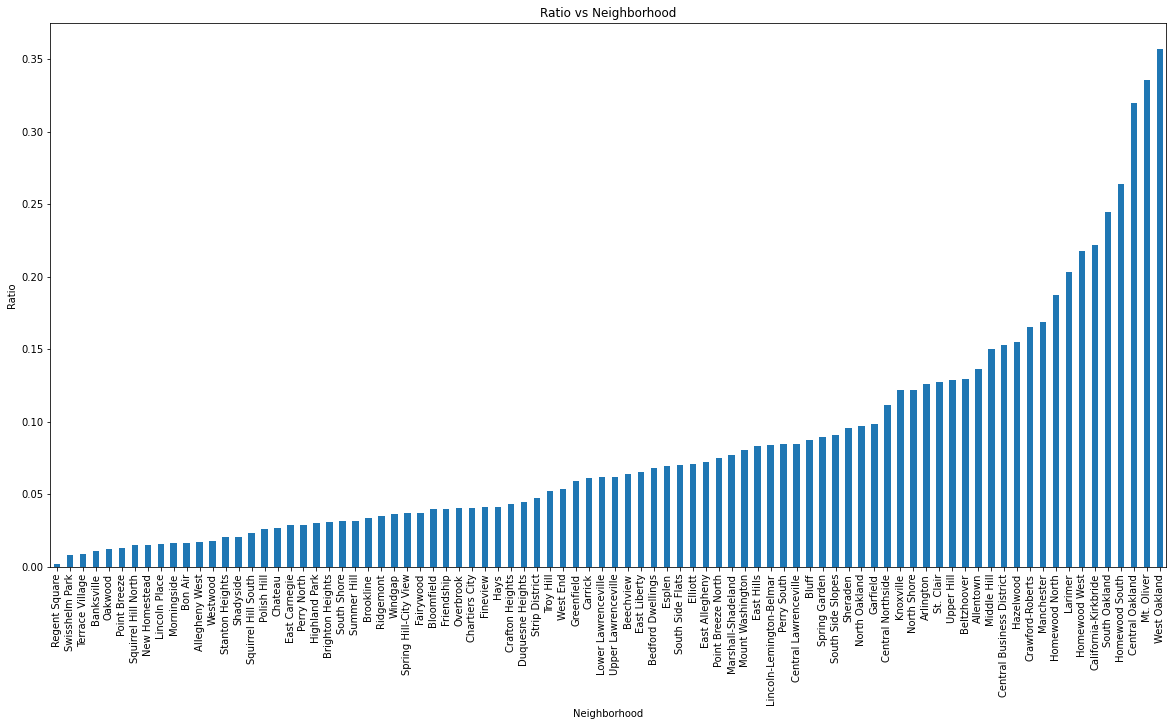

In [19]:
ratio_totals_sorted.plot(kind="bar", title="Ratio vs Neighborhood", figsize=(20, 10))
plt.ylabel("Ratio")

#### Merged Data Analysis

Here we combined all of our data into a single set to determine the best neighborhood in Pittsburgh based on our metrics. Each metric was weighted equally. Filtered the same outlier neighborhoods that were filtered in the employment data set.

In [80]:
finalEducation = educationPopulation.loc["Shadyside" : "Northview Heights"]
finalEmployment = employment.loc[:, "Employment Rate"].div(100)
finalViolation = ratio_totals_sorted.loc["Regent Square" : "West Oakland"].multiply(100)
final = finalEmployment.multiply(finalEducation).div(finalViolation)
final = final.dropna()
final = final.sort_values()
final

Neighborhood
Mt. Oliver                0.000000
East Carnegie             0.000000
Esplen                    0.000000
North Shore               0.743904
Homewood West             0.995862
                          ...     
Point Breeze            652.459241
Regent Square           849.895200
Squirrel Hill South     954.519552
Squirrel Hill North    1112.268600
Shadyside              1303.917847
Length: 83, dtype: float64

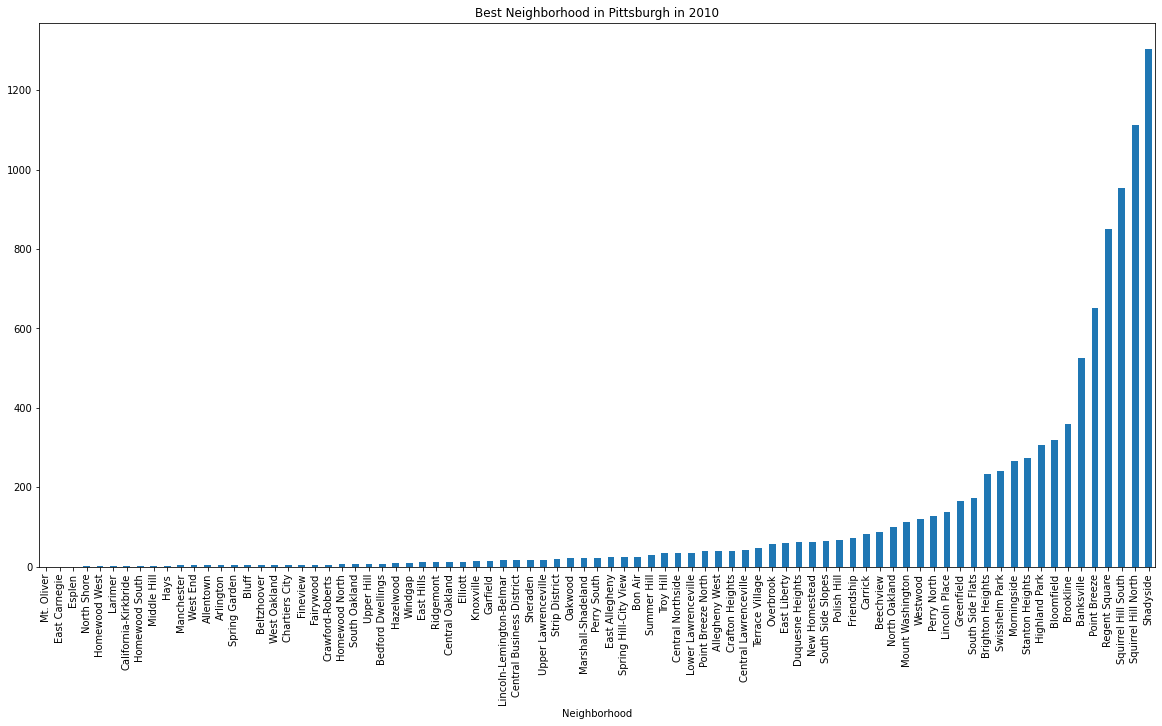

In [82]:
final.plot(kind="bar", title="Best Neighborhood in Pittsburgh in 2010", figsize=(20, 10))